In [ ]:
#  Problem:--> Predict the next day’s closing stock price based on historical stock data (like Open, High, Low, Close, Volume)



import yfinance as yf 
df = yf.download('AAPL' , start= '2020-01-01', end=  '2025-01-01')
df.head()







C:\Users\varshith yadav\AppData\Local\Temp\ipykernel_21680\3923752158.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL' , start= '2020-01-01', end=  '2025-01-01')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.538498,72.598876,71.292289,71.545875,135480400
2020-01-03,71.833313,72.594079,71.608707,71.765690,146322800
2020-01-06,72.405678,72.444321,70.703012,70.954188,118387200
2020-01-07,72.065163,72.671356,71.845385,72.415353,108872000
2020-01-08,73.224419,73.526310,71.768094,71.768094,132079200


In [3]:
import pandas as pd

df = df[['Open' , 'High', 'Low',  'Volume', 'Close']]
df['Target'] = df['Close'].shift(-1)
df = df.dropna()
df.head()

Price,Open,High,Low,Volume,Close,Target
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,
2020-01-02,71.545875,72.598876,71.292289,135480400,72.538498,71.833313
2020-01-03,71.765690,72.594079,71.608707,146322800,71.833313,72.405678
2020-01-06,70.954188,72.444321,70.703012,118387200,72.405678,72.065163
2020-01-07,72.415353,72.671356,71.845385,108872000,72.065163,73.224419
2020-01-08,71.768094,73.526310,71.768094,132079200,73.224419,74.779762


MSE: 7.638432154709546
R2 Score: 0.995420996098533


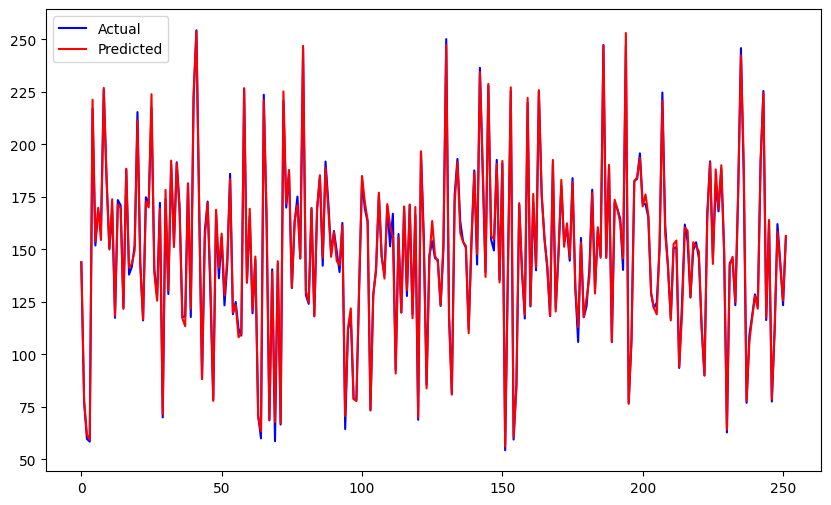

In [7]:
from sklearn.model_selection import train_test_split

X = df[['Open' , 'High', 'Low',  'Volume', 'Close']]  # features
y = df['Target'] 

X_train, X_test, y_train, y_test = train_test_split(X , y , test_size= 0.2, random_state= 42)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))



import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual', color='b')
plt.plot(y_pred, label='Predicted', color='r')
plt.legend()
plt.show()
